# Naive Bayes anhand des Pima American Natives Datensatzes

Quelle Datensatzes

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [43]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



def load_dataset(dataset_path):
    dataset = pd.read_csv(dataset_path)
    return dataset

path = 'diabetes.csv'



In [44]:
diabetes = load_dataset(path)

In [45]:
# Anzeigen der Dimensionen des Datensatzes
diabetes.shape

(768, 9)

In [46]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [47]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [48]:
diabetes.isna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [49]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

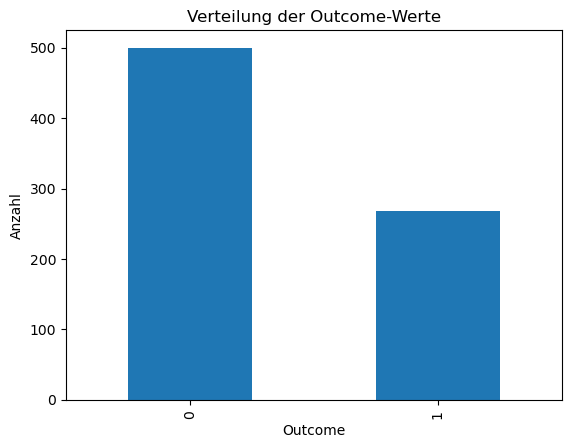

In [50]:
diabetes['Outcome'].value_counts().plot.bar()
plt.title('Verteilung der Outcome-Werte')
plt.xlabel('Outcome')
plt.ylabel('Anzahl')
plt.show()


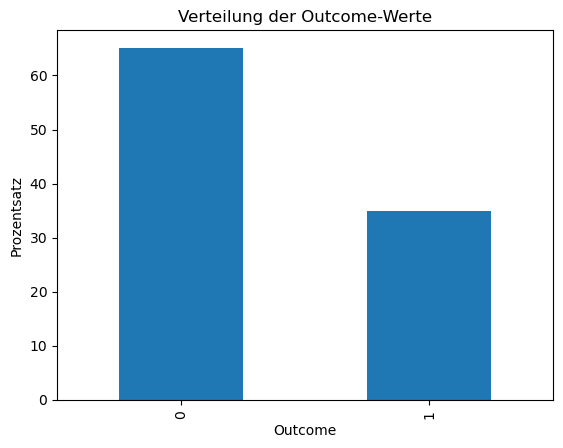

In [51]:
diabetes['Outcome'].value_counts(normalize=True) * 100
(diabetes['Outcome'].value_counts(normalize=True) * 100).plot.bar()
plt.title('Verteilung der Outcome-Werte')
plt.xlabel('Outcome')
plt.ylabel('Prozentsatz')
plt.show()


In [52]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

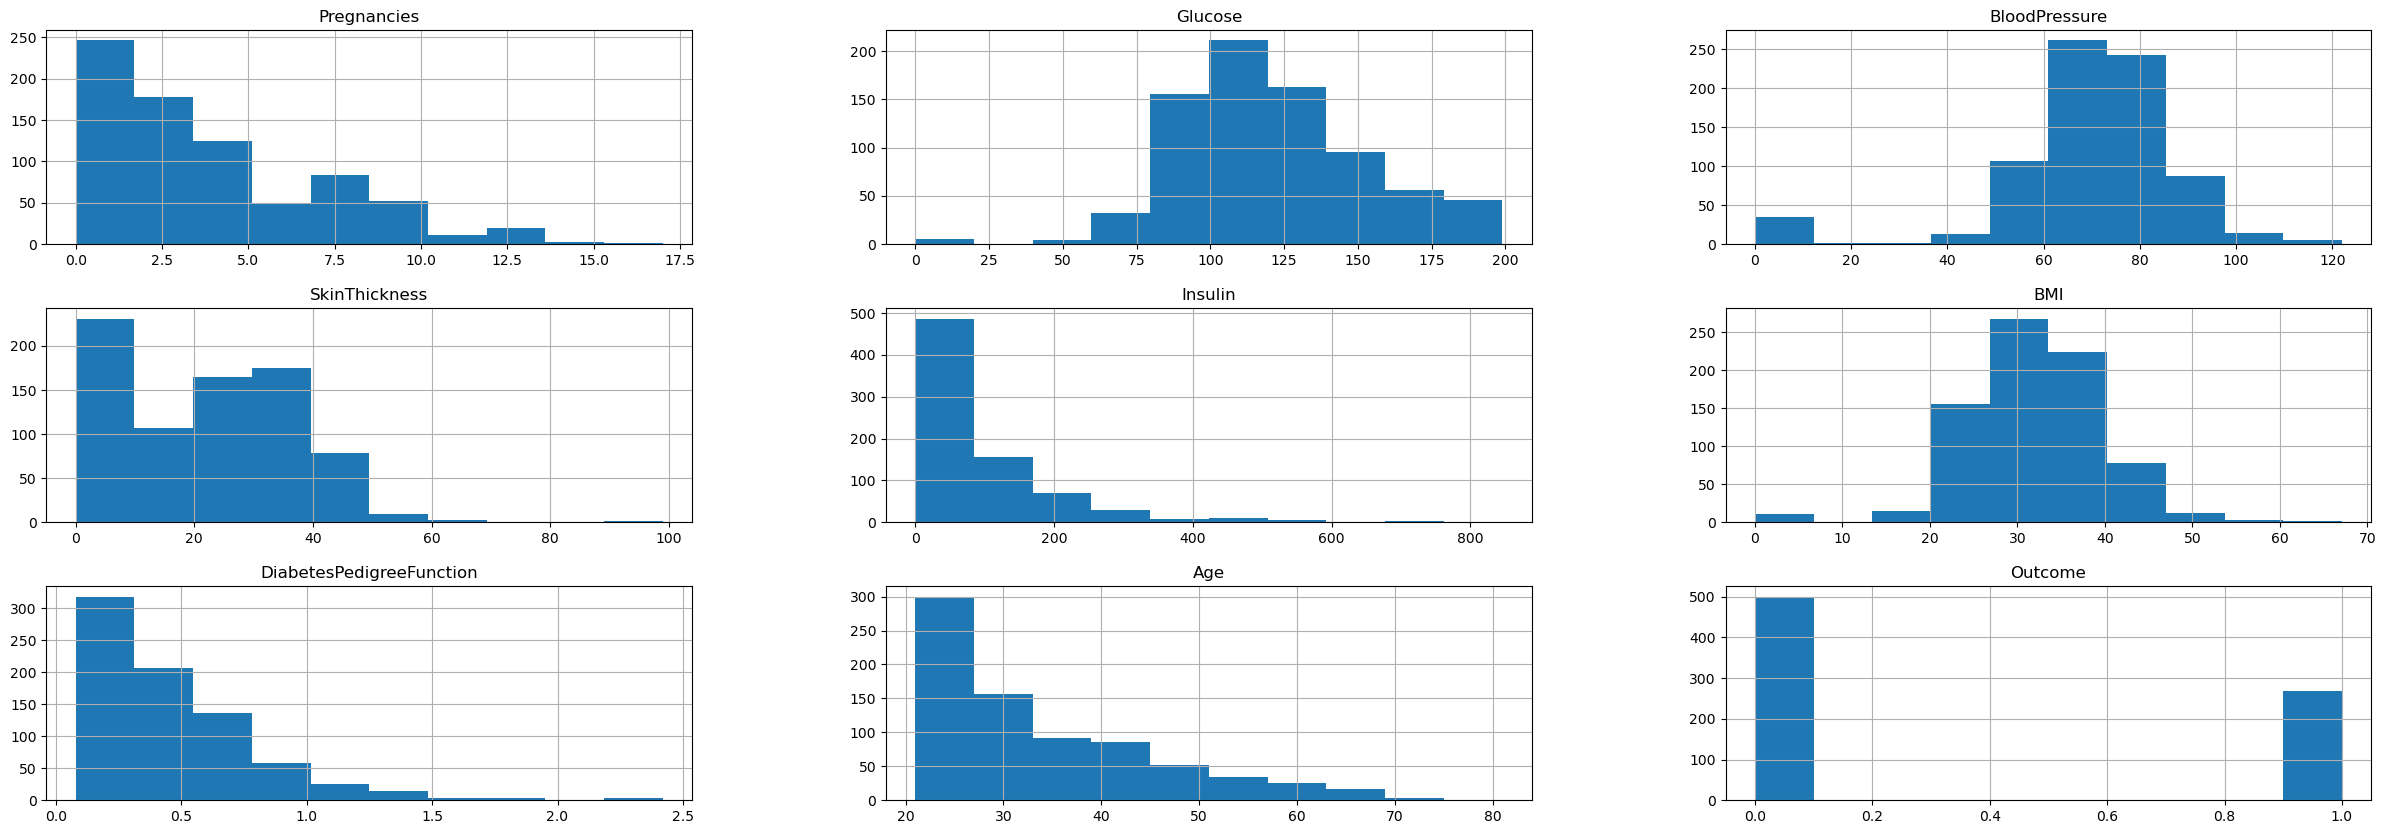

In [53]:
diabetes.hist(figsize=(30,10))

In [54]:
diabetes.corr().abs()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

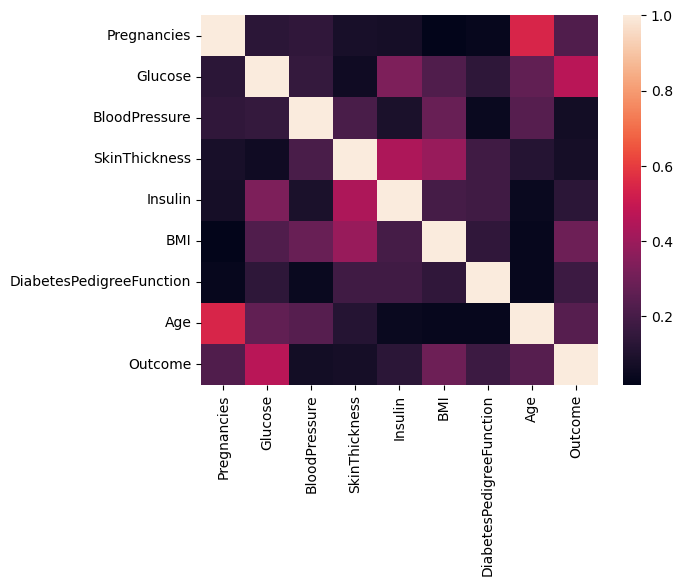

In [55]:
#To check for correlation between different Attributes of the given dataset
corr = diabetes.corr().abs()
sns.heatmap(corr)

"Diabetes Pedigree Function: indicates the function which scores likelihood of diabetes based on family history"

https://www.analyticsvidhya.com/blog/2021/07/diabetes-prediction-with-pycaret/

In [56]:
from sklearn.model_selection import train_test_split

def split_dataset(dataset, test_size, random_state):
    X = dataset.drop('Outcome', axis=1)
    y = dataset['Outcome']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test


In [57]:
X_train, X_test, y_train, y_test = split_dataset(diabetes, 0.3, 42)

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix

def evaluate_model(X_train, X_test, y_train, y_test, model):
    # Training des Modells
    model.fit(X_train, y_train)
    # Vorhersage auf den Testdaten
    y_pred = model.predict(X_test)

    # Berechnung der Genauigkeit des Modells
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Genauigkeit: {accuracy}")

    # Erstellung einer Konfusionsmatrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Konfusionsmatrix:\n{cm}")



In [59]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [60]:
# Evaluation des Modells mit Testdaten
evaluate_model(X_train, X_test, y_train, y_test, nb)

Genauigkeit: 0.7445887445887446
Konfusionsmatrix:
[[119  32]
 [ 27  53]]


## Ausreißer

In [61]:
# Anzeigen der Wertebereiche der Merkmalsvariablen
num_cols = diabetes.select_dtypes(include='number').columns
min_max = diabetes[num_cols].agg(['min', 'max'])
min_max

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
min,0,0,0,0,0,0.0,0.078,21,0
max,17,199,122,99,846,67.1,2.420,81,1


In [62]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def scale_diabetes_data(df):
    
    # Create a scaler object
    scaler = MinMaxScaler()

    # Scale all columns except the target variable 'Outcome'
    X_scaled = scaler.fit_transform(df.drop('Outcome', axis=1))

    # Create a new DataFrame with the scaled values
    diabetes_scaled = pd.DataFrame(X_scaled, columns=df.columns[:-1])

    # Add the target variable 'Outcome' back in
    diabetes_scaled['Outcome'] = df['Outcome']

    return diabetes_scaled


In [63]:
# Scale the dataset
diabetes_scaled = scale_diabetes_data(diabetes)

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

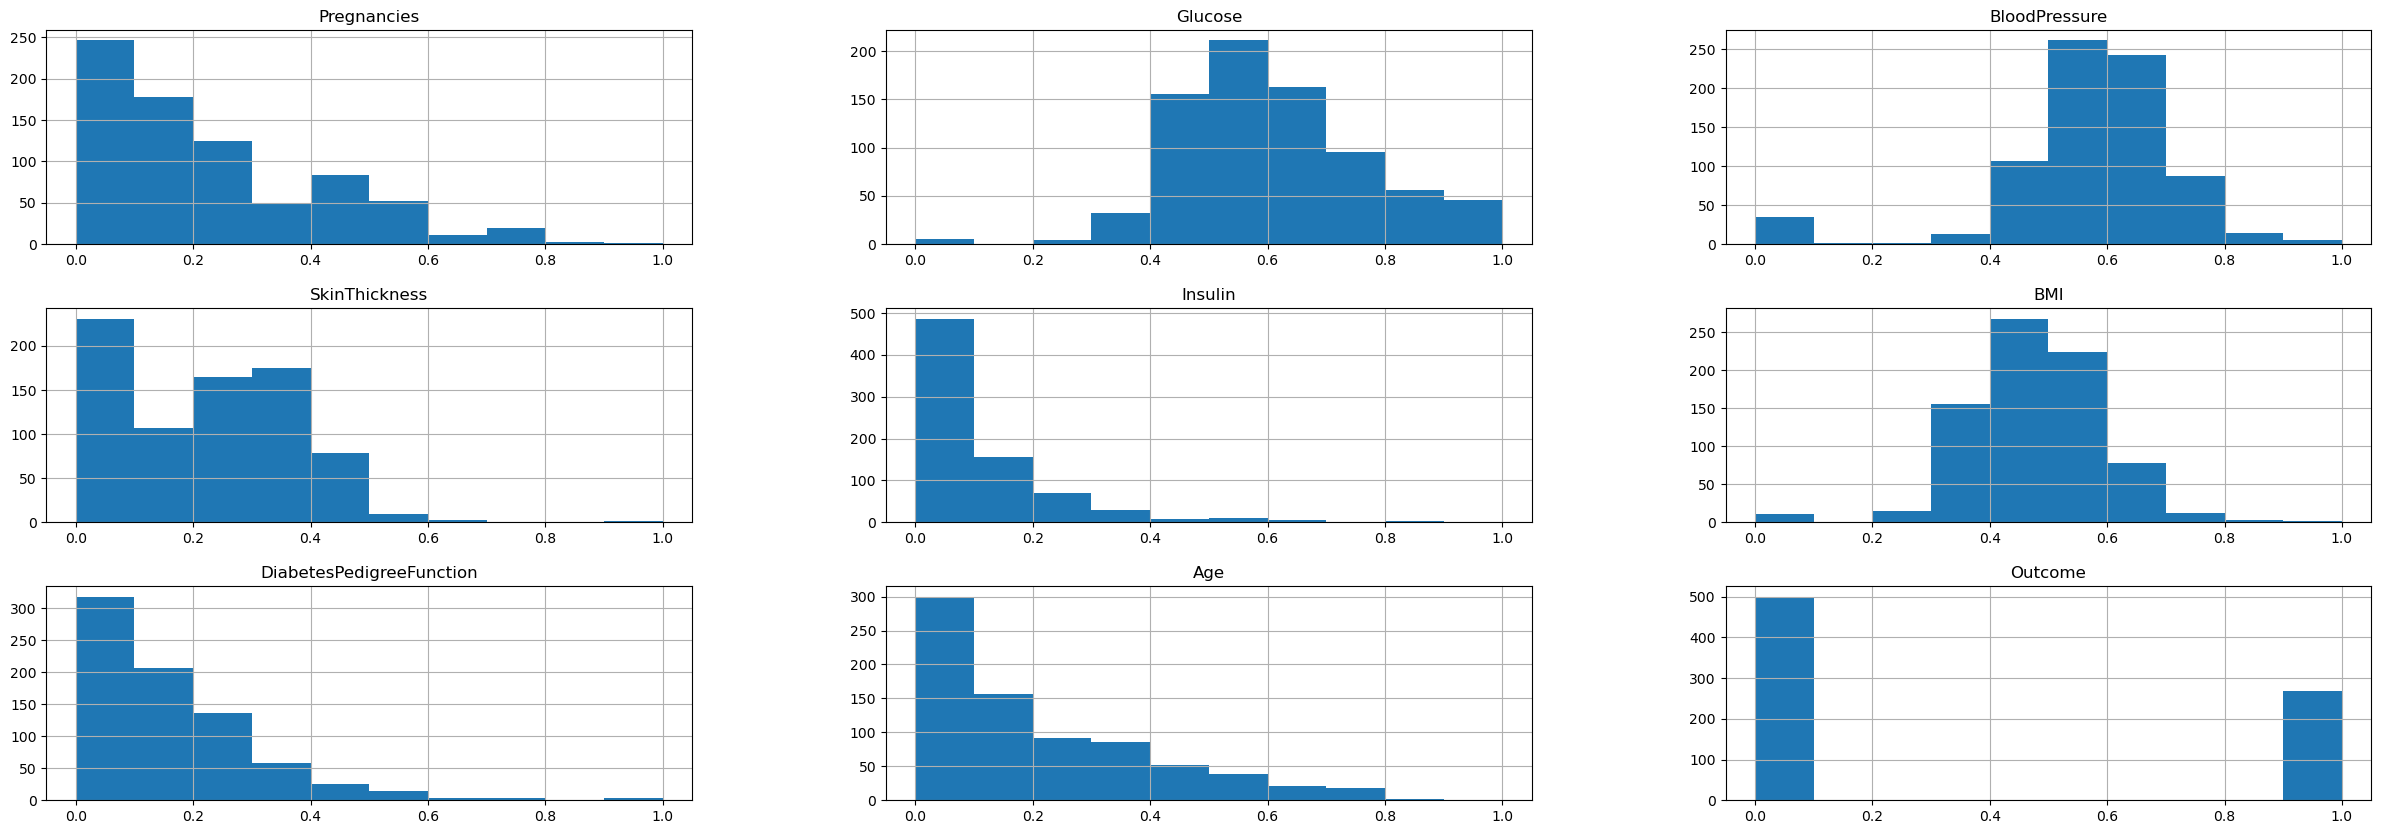

In [64]:
diabetes_scaled.hist(figsize=(30,10))

In [65]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = split_dataset(diabetes_scaled, 0.3, 42)

evaluate_model(X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, nb)

Genauigkeit: 0.7445887445887446
Konfusionsmatrix:
[[119  32]
 [ 27  53]]


## Kreuzvalidierung

In [66]:
from sklearn.model_selection import cross_val_score, KFold

def perform_cross_validation(dataset, test_size, random_state, n_splits, algorithm):
    
    # Aufteilen des Datensatzes in Trainings- und Testdaten
    X_train, X_test, y_train, y_test = split_dataset(dataset, test_size, random_state)
    
    # Erstellen des KFold-Objekts
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    # Durchführen der K-Fold Cross-Validation
    scores = cross_val_score(algorithm, X_train, y_train, cv=kf)

    # Berechnen der durchschnittlichen Genauigkeit und Standardabweichung
    avg_accuracy = scores.mean()
    std_deviation = scores.std()
    # Ergebnisse drucken
    print(f"Durchschnittliche Genauigkeit: {avg_accuracy:.3f}")
    print(f"Standardabweichung: {std_deviation:.3f}")
    print("Ergebnisse:", scores)
    


In [67]:
perform_cross_validation(diabetes, 0.3, 42, 5, nb)

Durchschnittliche Genauigkeit: 0.745
Standardabweichung: 0.037
Ergebnisse: [0.75925926 0.7037037  0.70093458 0.76635514 0.79439252]


## Recall / Precision

Berechnung von Relevanz (,,erkennen" der Diabetes Fälle) und Sensivität (Diabetes ,,erkennen" und richtig liegen) 

In [68]:
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_predict

def evaluate_prescision_recall(X_train, y_train):
    y_pred = cross_val_predict(nb, X_train, y_train, cv=10)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    return (f'precision: {precision}, recall: {recall}')

  

In [69]:
evaluate_prescision_recall(X_train, y_train)

'precision: 0.6835443037974683, recall: 0.574468085106383'

## F1 - Score

In [70]:
from sklearn.metrics import f1_score

def evaluate_f1_score(X_train, y_train):
    y_pred = cross_val_predict(nb, X_train, y_train, cv=10)
    f1 = f1_score(y_train, y_pred)
    return f1

In [71]:
evaluate_f1_score(X_train, y_train)

0.624277456647399

## Betrachten der PRC Kurve

In [72]:
from sklearn.metrics import precision_recall_curve

# sämtliche Datenpunkte im Trainingsdatensatz mit cross_val_predict ermitteln
# diesmal aber mit Entschiedungswerten statt mit Vorhersagen
y_scores = cross_val_predict(nb, X_train, y_train, cv=10, method='predict_proba')

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores[:, 1])

def plot_precision_recall_vs_treshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision / Relevanz")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall / Sensivität")
    plt.xlabel("Schwellenwert")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


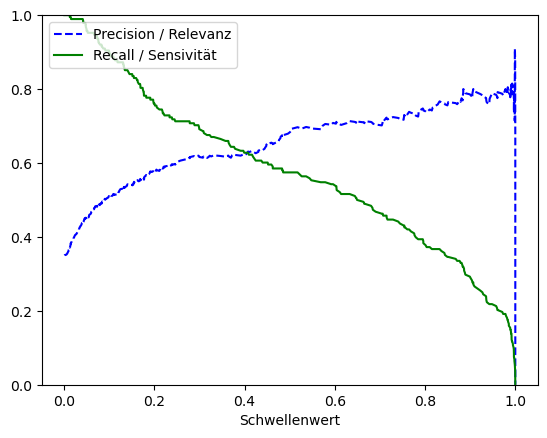

In [73]:
plot_precision_recall_vs_treshold(precisions, recalls, thresholds)
plt.show()

## ROC Kurve

= zeigt Richtig-positiv-Rate (TNR) gegen Falsch-positiv-Rate (FPR)

In [74]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores[:, 1])

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('Falsch-Positiv-Rate')
    plt.ylabel('Wahr-Positiv-Rate (Recall)')

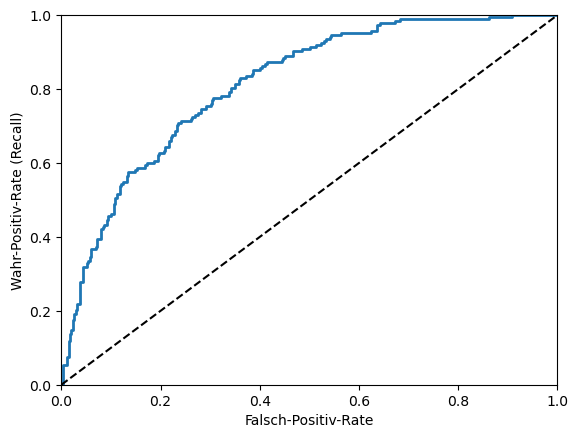

In [75]:
plot_roc_curve(fpr, tpr)
plt.show()

Bestimmung der **Area under the Curve (AUC)** 
Wert von 1 = perfekt, völlig zufällig = 0,5

(Aurélien Géron, Praxiseinstieg Machine Learning mit Scikit-Learn, Keras und TensorFlow, 2nd Edition, O'Reilly 2020, S.101)

In [76]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_scores[:, 1])

0.8136468938608791

Bevorzugung der ROC-Kurve, wenn positive Kategorie selten ist, oder falsch positiv wichtiger ist als falsch negativ

--> ist bei dem Diabetes Datensatz der Fall

(Aurélien Géron, Praxiseinstieg Machine Learning mit Scikit-Learn, Keras und TensorFlow, 2nd Edition, O'Reilly 2020, S.101)

# Vergleich anderer Varianten des Naive Bayes

### Bernouille Naive Bayes

In [77]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

In [78]:
evaluate_model(X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, bnb)

Genauigkeit: 0.6536796536796536
Konfusionsmatrix:
[[151   0]
 [ 80   0]]


In [79]:
perform_cross_validation(diabetes_scaled, 0.3, 42, 5, bnb)

Durchschnittliche Genauigkeit: 0.631
Standardabweichung: 0.025
Ergebnisse: [0.59259259 0.66666667 0.61682243 0.63551402 0.64485981]


### Multinomialer Naive Bayes

In [80]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

In [81]:
evaluate_model(X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, mnb)

Genauigkeit: 0.6536796536796536
Konfusionsmatrix:
[[151   0]
 [ 80   0]]


In [82]:
perform_cross_validation(diabetes_scaled, 0.3, 42, 5, mnb)

Durchschnittliche Genauigkeit: 0.650
Standardabweichung: 0.023
Ergebnisse: [0.63888889 0.69444444 0.62616822 0.64485981 0.64485981]


## Datensätze für die anderen Naive Bayes Varianten

### a) Categorial Bayes

https://www.kaggle.com/datasets/uciml/mushroom-classification

Pilz-Datensatz zur Klassifikation essbaren/giftigen Pilzes

*Hinweis*: Die kategorischen Werte muessen zuvor in binäre Merkmale umgewandelt werden

### b) Multinomialer Naive Bayes

https://www.kaggle.com/datasets/kazanova/sentiment140

Twitter Datensatz, um zu klassifizieren, ob die Stimmung eines Tweets positiv, negativ oder neutral ist

*Hinweis:* Die Trainings- und Testdaten muessen vorbereitet  werden, um eine Bag-of-Words-Repraesentation zu erstellen, dazu bietet sich Folgendes an:


In [83]:

from sklearn.feature_extraction.text import CountVectorizer

# Multiple documents
text = ["It was the best of times", "it was the worst of times", "it was the age of wisdom", "it was the age of foolishness"] 
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(sorted(vectorizer.vocabulary_))

# (Quelle: https://www.kaggle.com/code/vipulgandhi/bag-of-words-model-for-beginners?scriptVersionId=23921084&cellId=2)

['age', 'best', 'foolishness', 'it', 'of', 'the', 'times', 'was', 'wisdom', 'worst']


#### *Erklärung Bag-of-Words*

Hierbei wird ein Text in eine Menge von Wörtern zerlegt und die Häufigkeit jedes Wortes im Text erfasst. Die Häufigkeiten werden dann als Vektoren dargestellt, wobei jeder Eintrag im Vektor für die Anzahl eines bestimmten Worts im Text steht. Die Reihenfolge der Wörter im Text ist dabei nicht relevant, es wird keine Rücksicht auf die Grammatik oder die Struktur des Textes genommen.

(Quelle: https://www.kaggle.com/code/vipulgandhi/bag-of-words-model-for-beginners)


### c) Bernouille Naive Bayes

ACHTUNG: ein wenig Knifflig!

Datensatz zur Spam-Klassifizierung

*Hinweis*: Den Text der Emails zuvor von Satzzeichen und Zahlen bereinigen. Ebenso bietet es sich an den das NLTK-Paket für Stopwörter zu nutzen 
```
import nltk
from nltk.corpus import stopwords
```
weiterführende Informationen
https://pythonspot.com/nltk-stop-words/